# Links and Sources

### Energy Information Administration (EIA)
The U.S. Energy Information Administration (EIA) is a principal agency of the U.S. Federal Statistical System responsible for collecting, analyzing, and disseminating energy information. <br>
https://www.eia.gov/


### Electric Sales, Revenue, and Average Price
https://www.eia.gov/electricity/sales_revenue_price/index.php

### Retail Sales - All (Residential, Commercial, Industrial, Transportation)
https://www.eia.gov/electricity/sales_revenue_price/pdf/table_10.pdf <br>
Gives : City, State, #Customers, # MWhrs, # dollars, Average energy price

### Terminology

Difference between Privately owned utilities, Cooperatives, Municipalities : https://ceateam.com/whats-difference-privately-owned-utilities-cooperatives-municipalities/

# Plan 

1. Get demand data from for all the possible cities in US
2. Get demand data from all other sources (excluding cities) for each state
3. Get the average demand per sq.miles for each state using data from (2)
3. Find a way to see what cities are within a given distance 'd' from any given coordinates
4. The total demand at any given coordinate will be the sum of 
    1. The demand from all the cities included in distance 'd' around it
    2. **The total demand from all other sources calculated using (2)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import ast
import geopy.distance

# Loading data for entire US

In [2]:
data = pd.read_excel('dataset_energy_demand.xlsx')
data.columns = data.iloc[1]
data.drop(data.index[0:2], inplace=True)
data.reset_index(drop=True,inplace=True)
data

1,Entity,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh)
0,Alaska Electric Light & Power Co.,AK,Investor Owned,17701,405072,46496.8,11.478651
1,Alaska Power and Telephone Co,AK,Investor Owned,8289,73691,23750,32.229173
2,"Alaska Village Elec Coop, Inc",AK,Cooperative,11512,124689,60171.8,48.257505
3,Chugach Electric Assn Inc,AK,Cooperative,113096,1902625,322098.3,16.929153
4,Golden Valley Elec Assn Inc,AK,Cooperative,47669,1244414,282561.3,22.706374
...,...,...,...,...,...,...,...
1642,Adjustment 2022,VT,Other,33230,442257,71575.1,.
1643,Adjustment 2022,WA,Other,67197,1396093,133891.3,.
1644,Adjustment 2022,WI,Other,184746,3367431,418071.9,.
1645,Adjustment 2022,WV,Other,11160,155580,22923.4,.


# Extracting only California data
## Add columns to save (latitude, longitude)

In [3]:
data_california = data.copy()
data_california = data_california[data_california['State']=='CA']
data_california.reset_index(drop=True,inplace=True)

data_california['Latitude'] =''
data_california['Longitude']=''
data_california

1,Entity,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh),Latitude,Longitude
0,"Ahana Renewables, LLC",CA,NaN,25,10720,2483,23.162313,,
1,Alameda Municipal Power,CA,Municipal,36377,334047,63740.4,19.081267,,
2,Bear Valley Electric Service,CA,Investor Owned,24678,142433,39917.7,28.025598,,
3,City & County of San Francisco,CA,Municipal,1992,927238,154048,16.613642,,
4,City of Anaheim - (CA),CA,Municipal,122391,2221927,347824,15.65416,,
5,City of Azusa,CA,Municipal,16967,237344,38571,16.251095,,
6,City of Burbank Water and Power,CA,Municipal,53252,978966,154304,15.761937,,
7,City of Colton - (CA),CA,Municipal,20330,353743,58223,16.459124,,
8,City of Corona - (CA),CA,Municipal,1840,82794,11268.2,13.609923,,
9,City of Glendale - (CA),CA,Municipal,90283,1027035,214332.2,20.869026,,


# Manually adding the latitude and longitudes for all Entities 

In [4]:
c_data = {}
for name in data_california['Entity']:
    c_data[name]={'Latitude':'','Longitude':''}

# for name in data_california['Entity']:
#     print(f"c_data['{name}']['Latitude'], c_data['{name}']['Longitude'] = '','' ,")


c_data['Ahana Renewables, LLC']['Latitude'], c_data['Ahana Renewables, LLC']['Longitude'] = '','' ,
c_data['Alameda Municipal Power']['Latitude'], c_data['Alameda Municipal Power']['Longitude'] = 37.77634429711531, -122.25240059975788 ,
c_data['Bear Valley Electric Service']['Latitude'], c_data['Bear Valley Electric Service']['Longitude'] = 34.24589054285114, -116.88573977074265 ,
c_data['City & County of San Francisco']['Latitude'], c_data['City & County of San Francisco']['Longitude'] = 37.7790262,-122.419906 ,
c_data['City of Anaheim - (CA)']['Latitude'], c_data['City of Anaheim - (CA)']['Longitude'] = 33.8347516,-117.911732 ,
c_data['City of Azusa']['Latitude'], c_data['City of Azusa']['Longitude'] = 34.1338751,-117.9056046,
c_data['City of Burbank Water and Power']['Latitude'], c_data['City of Burbank Water and Power']['Longitude'] = 34.1816482,-118.3258554 ,
c_data['City of Colton - (CA)']['Latitude'], c_data['City of Colton - (CA)']['Longitude'] = 34.0739016,-117.3136547 ,
c_data['City of Corona - (CA)']['Latitude'], c_data['City of Corona - (CA)']['Longitude'] = 33.8752945,-117.5664449 ,
c_data['City of Glendale - (CA)']['Latitude'], c_data['City of Glendale - (CA)']['Longitude'] = 34.1469416,-118.2478471 ,
c_data['City of Lodi - (CA)']['Latitude'], c_data['City of Lodi - (CA)']['Longitude'] = 38.124694250000005 , -121.2795345883064,
c_data['City of Moreno Valley - (CA)']['Latitude'], c_data['City of Moreno Valley - (CA)']['Longitude'] = 33.937517 , -117.2305944,
c_data['City of Palo Alto - (CA)']['Latitude'], c_data['City of Palo Alto - (CA)']['Longitude'] = 37.4443293 , -122.1598465,
c_data['City of Pasadena - (CA)']['Latitude'], c_data['City of Pasadena - (CA)']['Longitude'] = 34.1476452 , -118.1444779,
c_data['City of Redding - (CA)']['Latitude'], c_data['City of Redding - (CA)']['Longitude'] = 40.5863563 , -122.391675,
c_data['City of Riverside - (CA)']['Latitude'], c_data['City of Riverside - (CA)']['Longitude'] = 33.9533546 , -117.3961623,
c_data['City of Roseville - (CA)']['Latitude'], c_data['City of Roseville - (CA)']['Longitude'] = 38.7521235 , -121.2880059,
c_data['City of Santa Clara - (CA)']['Latitude'], c_data['City of Santa Clara - (CA)']['Longitude'] = 37.3541132 , -121.955174,
c_data['City of Vernon']['Latitude'], c_data['City of Vernon']['Longitude'] = 34.1513105 , -99.2860857,
c_data['Constellation Solar Holding, LLC']['Latitude'], c_data['Constellation Solar Holding, LLC']['Longitude'] = '','' ,
c_data['Greenbacker Renewable Energy Corporation']['Latitude'], c_data['Greenbacker Renewable Energy Corporation']['Longitude'] = '','' ,
c_data['Greenskies Renewable Energy, LLC']['Latitude'], c_data['Greenskies Renewable Energy, LLC']['Longitude'] = '','' ,
c_data['Imperial Irrigation District']['Latitude'], c_data['Imperial Irrigation District']['Longitude'] = 32.84716294268047, -115.5670040955087 ,
c_data['Kings River Conservation Dist']['Latitude'], c_data['Kings River Conservation Dist']['Longitude'] = 36.70684730256173, -119.73276423107694 ,
c_data['Liberty Utilities']['Latitude'], c_data['Liberty Utilities']['Longitude'] = '','' ,
c_data['Longroad Energy']['Latitude'], c_data['Longroad Energy']['Longitude'] = '','' ,
c_data['Los Angeles Department of Water & Power']['Latitude'], c_data['Los Angeles Department of Water & Power']['Longitude'] = 34.0536909 , -118.242766,
c_data['Merced Irrigation District']['Latitude'], c_data['Merced Irrigation District']['Longitude'] = 37.3029568 , -120.4843269,
c_data['Modesto Irrigation District']['Latitude'], c_data['Modesto Irrigation District']['Longitude'] = 37.6390972 , -120.9968782,
c_data['PacifiCorp']['Latitude'], c_data['PacifiCorp']['Longitude'] = '','' ,
c_data['Pacific Gas & Electric Co.']['Latitude'], c_data['Pacific Gas & Electric Co.']['Longitude'] = '','' ,
c_data['Sacramento Municipal Util Dist']['Latitude'], c_data['Sacramento Municipal Util Dist']['Longitude'] = 38.5810606 , -121.493895,
c_data['San Diego Gas & Electric Co']['Latitude'], c_data['San Diego Gas & Electric Co']['Longitude'] = 32.7174202 , -117.1627728,
c_data['Scale Sustainable I, LLC']['Latitude'], c_data['Scale Sustainable I, LLC']['Longitude'] = '','' ,
c_data['Southern California Edison Co']['Latitude'], c_data['Southern California Edison Co']['Longitude'] = '','' ,
c_data['Spruce Finance']['Latitude'], c_data['Spruce Finance']['Longitude'] = '','' ,
c_data['SunPower Capital, LLC']['Latitude'], c_data['SunPower Capital, LLC']['Longitude'] = '','' ,
c_data['Sunnova']['Latitude'], c_data['Sunnova']['Longitude'] = '','' ,
c_data['Sunrun Inc.']['Latitude'], c_data['Sunrun Inc.']['Longitude'] = '','' ,
c_data['Surprise Valley Electrification']['Latitude'], c_data['Surprise Valley Electrification']['Longitude'] = '','' ,
c_data['TerraForm US Energy Services, LLC']['Latitude'], c_data['TerraForm US Energy Services, LLC']['Longitude'] = '','' ,
c_data['Tesla Inc.']['Latitude'], c_data['Tesla Inc.']['Longitude'] = '','' ,
c_data['Turlock Irrigation District']['Latitude'], c_data['Turlock Irrigation District']['Longitude'] = 37.4946568 , -120.8465941,
c_data['Valley Electric Assn, Inc']['Latitude'], c_data['Valley Electric Assn, Inc']['Longitude'] = '','' ,
c_data['WAPA-- Western Area Power Administration']['Latitude'], c_data['WAPA-- Western Area Power Administration']['Longitude'] = '','' 

# How to get latitudes and longitudes for any city

In [5]:
import requests

city = 'Turlock'
country = 'USA'
state = 'California'
api_url = 'https://api.api-ninjas.com/v1/geocoding?city={}&country={}&state={}'.format(city,country,state)
response = requests.get(api_url + city, headers={'X-Api-Key': 'MUFmQYBgNJyE/VmlfN+wNA==aPmARELVzoFWzbT0'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)
    
res = json.loads(response.text)
a = ast.literal_eval(str(res[0]))
print(a)
print()
print(a['latitude'],',', a['longitude'])

[{"name": "Turlock", "latitude": 37.4946568, "longitude": -120.8465941, "country": "US", "state": "California"}]
{'name': 'Turlock', 'latitude': 37.4946568, 'longitude': -120.8465941, 'country': 'US', 'state': 'California'}

37.4946568 , -120.8465941


# Add the latitude and longitude data to California data

In [6]:
for entity in c_data:
    index = data_california.index[data_california['Entity']==entity]
    data_california.at[index[0],'Latitude'] =c_data[entity]['Latitude']
    data_california.at[index[0],'Longitude']=c_data[entity]['Longitude']
data_california

1,Entity,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh),Latitude,Longitude
0,"Ahana Renewables, LLC",CA,NaN,25,10720,2483,23.162313,,
1,Alameda Municipal Power,CA,Municipal,36377,334047,63740.4,19.081267,37.776344,-122.252401
2,Bear Valley Electric Service,CA,Investor Owned,24678,142433,39917.7,28.025598,34.245891,-116.88574
3,City & County of San Francisco,CA,Municipal,1992,927238,154048,16.613642,37.779026,-122.419906
4,City of Anaheim - (CA),CA,Municipal,122391,2221927,347824,15.65416,33.834752,-117.911732
5,City of Azusa,CA,Municipal,16967,237344,38571,16.251095,34.133875,-117.905605
6,City of Burbank Water and Power,CA,Municipal,53252,978966,154304,15.761937,34.181648,-118.325855
7,City of Colton - (CA),CA,Municipal,20330,353743,58223,16.459124,34.073902,-117.313655
8,City of Corona - (CA),CA,Municipal,1840,82794,11268.2,13.609923,33.875295,-117.566445
9,City of Glendale - (CA),CA,Municipal,90283,1027035,214332.2,20.869026,34.146942,-118.247847


# Function to get demand within a given distance

### Checks what entities in the data are within a given distance. Adds the demands from all these entities

### For entities whose coordinates are not present, the demand is equally distributed among all the other entities. This value is added to the demand

In [31]:
# Distance in miles.Default value = 50 miles 
# Returns demand in Megawatthours
def demand_within_distance(latitude,longitude,distance_in_miles=50):
    coords_1 = (latitude,longitude)
    demand = 0.
    for ind, row in data_california.iterrows():
        lat = data_california.at[ind,'Latitude']
        lon = data_california.at[ind,'Longitude']
        if lat!='' and lon!='':
            coords_2 = (lat,lon)
            d = geopy.distance.geodesic(coords_1, coords_2).miles
            if d<=distance_in_miles:
                demand += data_california.at[ind,'Sales (Megawatthours)']
                
    demand_from_unidentified_sources = np.sum(data_california[data_california['Latitude']=='']['Sales (Megawatthours)'])
    avg_demand_from_unidentified_sources = demand_from_unidentified_sources/len(data_california[data_california['Latitude']==''])
    
    demand += avg_demand_from_unidentified_sources
    return demand

# Example______________________________________________
lat,lon = 34.05266216325343, -118.26430627678283
dis = 50
print(demand_within_distance(lat,lon,dis))
#______________________________________________________

32421693.736842103


# Plotting how demand increases with increasing distance

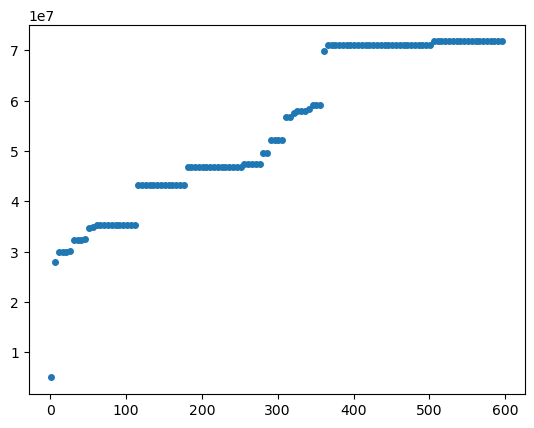

In [32]:
distance = np.arange(1,600,5)

lat,lon = 34.08029236093867, -118.27017871471111

demand = np.array([demand_within_distance(lat,lon,x) for x in distance])

plt.plot(distance[:600],demand[:600],'o', markersize='4')